In [1]:

import pandas as pd
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

import os

# Load the data

In [2]:
# Path to FITRES file
fitres_file = 'BBC1D_fixgamma0.FITRES'

# Display the first few lines of the file to understand its structure
with open(fitres_file, 'r') as file:
    lines = file.readlines()
    for line in lines[:10]:  # Print the first 10 lines
        print(line)

# Reading the file
df1 = pd.read_csv(fitres_file, sep='\s+', comment='#')

# Display the DataFrame
print(df1.head())


# VERSION_PHOTOMETRY(DATA):     DES5YR_SMP 

# VERSION_PHOTOMETRY(BIASCOR):   

# ISDATA_REAL:   1 

# SNANA_VERSION: v11_05n-95-g0136620 

# BBC_VERSION:   4 



# MIGRAD

# NCALL_FCN: 4641 

# CPU: 0.03 minutes

# MU-RESIDUAL NOTE: MURES = MU-(MUMODEL+M0DIF) 

  VARNAMES:      CID   CIDint  IDSURVEY  TYPE FIELD  CUTFLAG_SNANA  \
0       SN:  1562098  1562098        10     0    X2              3   
1       SN:  1702083  1702083        10     0    C2              3   
2       SN:  1435094  1435094        10     0    C3              3   
3       SN:  1309227  1309227        10     0    C3              3   
4       SN:  1324542  1324542        10     1    C2              3   

   ERRFLAG_FIT     zHEL  zHELERR  ...  CHI2  biasCor_nevt  biasCor_mu  \
0            0  0.57747    0.001  ...  1.71             0     -0.0512   
1            0  0.38932    0.001  ...  0.47             0     -0.0050   
2            0  1.01778    0.001  ...  2.42             0     -0.0697   
3            0  0.92649 

In [3]:
#dataframe 2 to extract the value of logOII
file_path2 = 'ozdes_oII.csv'

df2 = pd.read_csv(file_path2)

df2.head()

,CID,ID_Host,SPECZ,LOG_OII,LOG_OII_ERR,HOST_LOGMASS,HOST_LOGMASS_ERR,U-R
0,1644213,SVA1_COADD-2970925362,0.54622,0.534193,0.489119,10.46,0.04,1.29
1,1321492,SVA1_COADD-2971237980,0.55583,0.878993,0.558391,10.43,0.04,1.29
2,1896213,SVA1_COADD-2939364126,0.68757,0.744288,0.406872,11.08,0.03,1.49
3,1266255,SVA1_COADD-2939020332,0.29461,1.360995,0.308512,10.49,0.01,1.59
4,1279501,SVA1_COADD-2938843264,0.56655,1.072554,0.226491,10.26,0.04,1.17


In [4]:
#dataframe foundation 
#dataframe foundation 
file_path_fond1 = 'Foundation_Master_File.csv'
dff1 = pd.read_csv(file_path_fond1)
dff1_main= dff1[['mu_res_x1_c','SN','OII_EW','zHD', 'mu_err_x1_c']]
print(dff1_main)
# Drop rows where 'OII_EW' is NaN
dff1_main_non_nan = dff1_main.dropna(subset=['OII_EW'])
#find median redshift
redshift=dff1_main_non_nan['zHD']
med_redshift=np.median(redshift)
file_path_fond2 = 'FN_Host_Properties-3.csv'
dff2 = pd.read_csv(file_path_fond2)
dff2.head()

     mu_res_x1_c           SN    OII_EW      zHD  mu_err_x1_c
0       0.022315    SN2016coj       NaN  0.00570     0.482154
1      -0.024013       2018gv       NaN  0.00602     0.348138
2       0.278647       2019np       NaN  0.00648     0.320006
3      -0.103493      2017erp       NaN  0.00677     0.369122
4       0.010428  ASASSN-15so       NaN  0.00857     0.264834
..           ...          ...       ...      ...          ...
174     0.248538    Gaia16acv       NaN  0.07859     0.140942
175    -0.208416      PS15bzz  0.955859  0.07931     0.142165
176    -0.016114    SN2016glp       NaN  0.08410     0.218094
177    -0.093876    SN2016grz       NaN  0.08704     0.213306
178     0.130085     iPTF17dz       NaN  0.09293     0.491364

[179 rows x 5 columns]


,Unnamed: 0,Names,Redshift,SN_RA,SN_DEC,HOST_RA,HOST_DEC,LOGMASS,Color,HR,HR_err
0,0,SN2016coj,0.00570,182.028,65.1772,182.024310,65.174310,10.769,1.298282,0.019315,0.483672
1,1,2018gv,0.00602,121.394,-11.4379,121.408500,-11.427030,10.094,1.295473,-0.027013,0.350271
2,2,2019np,0.00648,157.342,29.5106,157.333080,29.491830,10.231,1.048933,0.275647,0.322304
3,3,2017erp,0.00677,227.312,-11.3342,227.317040,-11.321670,10.166,1.295473,-0.106493,0.371159
4,4,ASASSN-15so,0.00857,168.546,48.3187,168.545385,48.318615,10.632,1.048933,0.007428,0.267587


Extracting values from the data

In [5]:
#constant for hubble residuals
alpha= 0.159
beta= 2.73
M= -19.3755
#parameter extracted from dataframe 1 to compute hubble residuals
mB = df1['mB']
x1 = df1['x1']
c = df1['c']
biascorr= df1['biasCor_mu']
z= df1['zHD']

In [6]:
#compute hubble residuals
mu= mB - M - beta*c + alpha*x1 - biascorr
#add mu to dataframe 1
df1['mu'] = mu
print(mu)


0       42.835085
1       41.703884
2       43.608975
3       44.286468
4       42.553979
          ...    
1528    41.078641
1529    41.440446
1530    42.922963
1531    41.606657
1532    39.766849
Length: 1533, dtype: float64


In [7]:
#calculate theoretical distance modulus
cosmo = FlatLambdaCDM(H0=70, Om0=0.315, Tcmb0=2.725)
distance_modulus = np.zeros(len(z))
# Define the redshift of the object
for i in range(len(z)):
    distance_modulus[i] = cosmo.distmod(z[i]).value
distance_modulus


array([42.61962048, 41.60297012, 44.12601   , ..., 43.07075829,
       41.58976092, 39.89703104])

In [8]:
#compute hubble residuals
delta_mu= mu- (distance_modulus + df1['M0DIF'])
#add to dataframe 1
df1['delta_mu'] = delta_mu
delta_mu

0       0.239964
1       0.105414
2      -0.535035
3       0.393481
4       0.120916
          ...   
1528    0.013079
1529   -0.433256
1530   -0.150295
1531    0.021396
1532   -0.169082
Length: 1533, dtype: float64

In [9]:
#additional: evaluating the difference of distance modulus calculated by me and from marcus data
mures= df1['MURES']
difference_data= abs(delta_mu-mures)
print('the difference of distance modulus calculated by me and marcus data:', difference_data)


the difference of distance modulus calculated by me and marcus data: 0       0.002364
1       0.001314
2       0.000765
3       0.001281
4       0.000816
          ...   
1528    0.001779
1529    0.001144
1530    0.001705
1531    0.001996
1532    0.001118
Length: 1533, dtype: float64


In [10]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)
#merge df1 and df2 based on CID
#df_merged is final dataset
df_merged = df1.merge(df2[['CID','LOG_OII', 'LOG_OII_ERR','SPECZ']], on='CID')
#display variable from dataframe1
for col in df_merged.columns:
    print(col)
#i have 3 candidates for redshift, SPECZ, zHD, and zHEL
print(df_merged['SPECZ'])
print(df_merged['zHD'])

VARNAMES:
CID
CIDint
IDSURVEY
TYPE
FIELD
CUTFLAG_SNANA
ERRFLAG_FIT
zHEL
zHELERR
zCMB
zCMBERR
zHD
zHDERR
VPEC
VPECERR
MWEBV
HOST_NMATCH
HOST_NMATCH2
HOST_OBJID
HOST_ZPHOT
HOST_ZPHOTERR
HOST_ZSPEC
HOST_ZSPECERR
HOST_RA
HOST_DEC
HOST_ANGSEP
HOST_DDLR
HOST_CONFUSION
HOST_LOGMASS
HOST_LOGMASS_ERR
HOST_SBFLUXCAL_g
HOST_SBFLUXCAL_r
HOST_SBFLUXCAL_i
HOST_SBFLUXCAL_z
HOST_SBMAG_g
HOST_SBMAG_r
HOST_SBMAG_i
HOST_SBMAG_z
PKMJDINI
SNRMAX1
SNRMAX2
SNRMAX3
PKMJD
PKMJDERR
x1
x1ERR
c
cERR
mB
mBERR
x0
x0ERR
COV_x1_c
COV_x1_x0
COV_c_x0
NDOF
FITCHI2
FITPROB
RA
DEC
HOST_ANGSEP_2
TGAPMAX
TrestMIN
TrestMAX
FLUXCALMAX_g
SNRMAX_g
FLUXCALMAX_r
SNRMAX_r
FLUXCALMAX_i
SNRMAX_i
FLUXCALMAX_z
SNRMAX_z
HOSTGAL_LOGMASS
HOSTGAL_LOGMASS_ERR
HOST_LOGSFR
HOST_LOGSFR_ERR
HOST_LOGsSFR
HOST_COLOR
HOST_LOGsSFR_ERR
HOST_COLOR_ERR
PROB_SCONE
PROB_SNIRFV19
PROB_SNNDESCC
PROB_SNNJ17
PROB_SNNV19
PROB_UNITY
CUTMASK
MU
MUMODEL
MUERR
MUERR_RENORM
MUERR_RAW
MUERR_VPEC
MURES
MUPULL
M0DIF
M0DIFERR
CHI2
biasCor_nevt
biasCor_mu
biasCorErr_

# Define function

In [11]:
#function:compute weighted average
def weighted_average(values, errors):
    """
    Calculate the weighted average of a list of values, where the weights are 1/(error^2).

    :param values: List of numerical values.
    :param errors: List of errors corresponding to the values.
    :return: The weighted average.
    """
    if len(values) != len(errors):
        raise ValueError("Values and errors must be of the same length.")
    
    # Calculate weights as 1/(error^2)
    weights = [1 / (error**2) for error in errors]
    
    weighted_sum = sum(value * weight for value, weight in zip(values, weights))
    total_weight = sum(weights)
    
    return weighted_sum / total_weight


#function: bootstrap resampling to compute the uncertainty
def create_bootstrap_samples_weighted(df, value_column, weight_column, sample_size=None, n_samples=1000):
    # If no sample_size is provided, use the entire DataFrame's length
    if sample_size is None:
        sample_size = len(df)
    
    # Create a list for sample weighted averages
    sample_weighted_averages = []
    
    # Loop n_samples times
    for _ in range(n_samples):
        # Create a bootstrap sample of sample_size with replacement
        bootstrap_sample = df.sample(n=sample_size, replace=True)
        
        # Extract the values and weights from the bootstrap sample
        values = bootstrap_sample[value_column]
        weights = 1 / (bootstrap_sample[weight_column] ** 2)
        
        # Calculate the weighted average for the bootstrap sample
        weighted_average = np.average(values, weights=weights)
        
        # Add this weighted average to the list
        sample_weighted_averages.append(weighted_average)
    
    return pd.Series(sample_weighted_averages)

def intrinsic_error(error):
    sample_size = len(error)
    # Create a list for intrinsic error
    intrin_error = []
    # Loop over sample_size times
    for i in range(sample_size):
        weight = 1 / (error[i] ** 2)  # Calculate the weight for each error
        intrin_error.append(weight)   # Append each weight to the list
    
    # Calculate the final intrinsic error
    total_error = 1 / np.sqrt(sum(intrin_error))
    return total_error


# HUBBLE RESIDUALS VS EW[OII]

In [12]:
#find median of [COLOR]
color= df_merged['HOST_COLOR']
med_color= 0.75

#split data into two
color_below_median = df_merged[color <= med_color]
color_above_median = df_merged[color > med_color]

#weighted average for below median 
color_values_bm = color_below_median['delta_mu']
color_weights_bm = color_below_median['MUERR']
color_wa_bm = weighted_average(color_values_bm, color_weights_bm)
print(f"(COLOR) The weighted average below median is: {color_wa_bm}")
#weighted average for above median
color_values_am = color_above_median['delta_mu']
color_weights_am = color_above_median['MUERR']
color_wa_am = weighted_average(color_values_am, color_weights_am)
print(f"(COLOR) The weighted average above median is: {color_wa_am}")

#uncertainty for below median
color_bootstrap_bm = create_bootstrap_samples_weighted(color_below_median, 'delta_mu', 'MUERR')
color_std_bm= np.std(color_bootstrap_bm)
print("(COLOR) uncertainty for below median data:", color_std_bm)
#uncertainty for above median
color_bootstrap_am = create_bootstrap_samples_weighted(color_above_median, 'delta_mu', 'MUERR')
color_std_am= np.std(color_bootstrap_am)
print("(COLOR) uncertainty for above median data:", color_std_am)

#find corresponding x axis (median)
colorx_bm=color_below_median['HOST_COLOR']
color_x_bm= np.median(colorx_bm)
colorx_am=color_above_median['HOST_COLOR']
color_x_am= np.median(colorx_am)

#extract axis for plot
#y axis for plot
dmu=df_merged['delta_mu']
#x axis for plot
color

#calculate the difference of hubble residuals
color_step= abs(color_wa_am -color_wa_bm)
color_step_err= np.sqrt((color_std_am)**2 + (color_std_bm)**2)
print("(COLOR) hubble residual diff:", color_step)
print("(COLOR) the error of hubble residual diff:", color_step_err)

(COLOR) The weighted average below median is: 0.038204333950970594
(COLOR) The weighted average above median is: -0.023137583096743405
(COLOR) uncertainty for below median data: 0.009531498172949932
(COLOR) uncertainty for above median data: 0.007643066390085241
(COLOR) hubble residual diff: 0.061341917047713995
(COLOR) the error of hubble residual diff: 0.012217443319459212


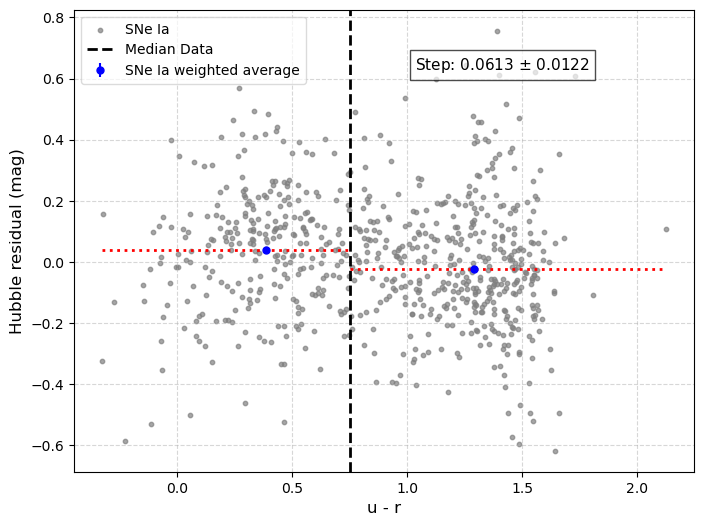

In [13]:
plt.figure(figsize=(8, 6))

# Scatter plot for the data points
plt.scatter(color, dmu, s=10, color='gray', alpha=0.7, label='SNe Ia')

# Labels and titles
plt.xlabel(r'u - r', fontsize=12)
plt.ylabel(r'Hubble residual (mag)', fontsize=12)
#plt.title(r'Hubble residuals vs U-R', fontsize=14)

# Add the vertical and horizontal lines
plt.axvline(x=med_color, color='black', linestyle='--', lw=2, label='Median Data')
plt.hlines(color_wa_bm, xmin=color.min(), xmax=med_color, color='red', linestyle=':', lw=2)  # Left side
plt.hlines(color_wa_am, xmin=med_color, xmax=color.max(), color='red', linestyle=':', lw=2)  # Right side

# Add error bars for weighted averages
plt.errorbar(color_x_bm, color_wa_bm, yerr=color_std_bm, fmt='o', color='blue', markersize=5, label='SNe Ia weighted average')
plt.errorbar(color_x_am, color_wa_am, yerr=color_std_am, fmt='o', color='blue', markersize=5)

# Add grid for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

# Adjusted legend style: Only one entry for weighted average w/ error
plt.legend(loc='upper left', fontsize=10, frameon=True, fancybox=True, framealpha=0.7)

# Add custom text annotation for the step
plt.text(0.55, 0.9, rf'Step: {color_step:.4f} $\pm$ {color_step_err:.4f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Save plot as a PNG file (overwrite if exists)
file_path1 = 'hubble_residuals_vs_color.png'
if os.path.isfile(file_path1):
    os.remove(file_path1)
plt.savefig(file_path1, dpi=300)

# Display the plot
plt.show()

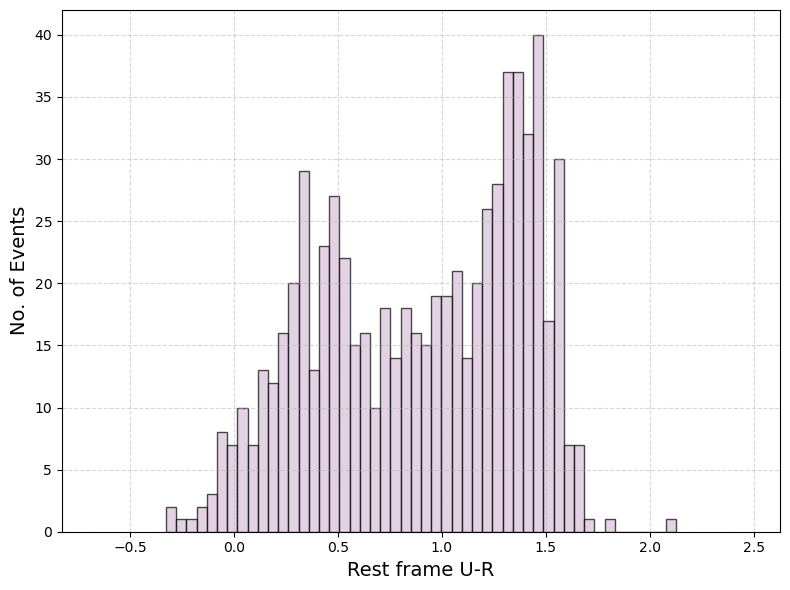

In [398]:
# Create the histogram
plt.figure(figsize=(8, 6))  # Adjust the figure size for better readability
plt.hist(color, bins=50, edgecolor='black', alpha=0.7, color='thistle')

# Set x-axis limits if needed
plt.xlim(np.min(color) - 0.5, np.max(color) + 0.5)  # Dynamic limits based on the data

# Add labels and title with larger fonts for clarity
plt.xlabel(r'Rest frame U-R', fontsize=14)
plt.ylabel(r'No. of Events', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()  # Adjusts the layout to prevent clipping
plt.show()

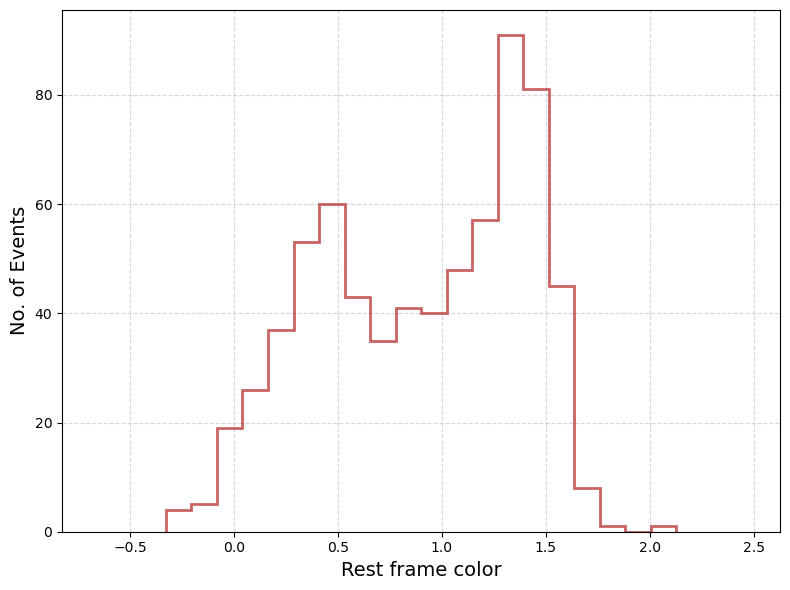

In [399]:


# Create the histogram as a line (outline only)
plt.figure(figsize=(8, 6))  # Adjust the figure size for better readability
plt.hist(color, bins=20, edgecolor='firebrick', alpha=0.7, color='thistle', histtype='step', linewidth=2)

# Set x-axis limits if needed
plt.xlim(np.min(color) - 0.5, np.max(color) + 0.5)  # Dynamic limits based on the data

# Add labels and title with larger fonts for clarity
plt.xlabel(r'Rest frame color', fontsize=14)
plt.ylabel(r'No. of Events', fontsize=14)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()  # Adjusts the layout to prevent clipping
plt.show()


# EVALUATING DATA FOR DIFFERENCE dDLR

In [400]:

#splitting data based on dDLR value
dDLR= df_merged['HOST_DDLR']
dDLR_lt1= df_merged[dDLR < 1]
dDLR_gt1= df_merged[dDLR >= 1]

dDLR<1

In [401]:


#find median of color
color_dDLR_lt1= dDLR_lt1['HOST_COLOR']
med_color_dDLR_lt1= med_color

#split data into two
color_dDLR_lt1_bm = dDLR_lt1[color_dDLR_lt1 <= med_color_dDLR_lt1]
color_dDLR_lt1_am = dDLR_lt1[color_dDLR_lt1 > med_color_dDLR_lt1]

#extract axis for plot
#y axis for plot
dmu_dDLR_lt1= dDLR_lt1['delta_mu']
#x axis for plot
color_dDLR_lt1

#weighted average for below median 
color_values_bm_dDLR_lt1 = color_dDLR_lt1_bm['delta_mu']
color_weights_bm_dDLR_lt1 = color_dDLR_lt1_bm['MUERR']
color_wa_bm_dDLR_lt1 = weighted_average(color_values_bm_dDLR_lt1, color_weights_bm_dDLR_lt1)
print(f"(COLOR) The weighted average below median for dDLR<1 is: {color_wa_bm_dDLR_lt1}")
#weighted average for above median
color_values_am_dDLR_lt1 = color_dDLR_lt1_am['delta_mu']
color_weights_am_dDLR_lt1 = color_dDLR_lt1_am['MUERR']
color_wa_am_dDLR_lt1 = weighted_average(color_values_am_dDLR_lt1, color_weights_am_dDLR_lt1)
print(f"(COLOR) The weighted average above median for dDLR<1 is: {color_wa_am_dDLR_lt1}")

#uncertainty for below median
color_bootstrap_bm_dDLR_lt1 = create_bootstrap_samples_weighted(color_dDLR_lt1_bm, 'delta_mu', 'MUERR')
color_std_bm_dDLR_lt1= np.std(color_bootstrap_bm_dDLR_lt1)
print("(COLOR) uncertainty for below median for dDLR<1 data:", color_std_bm_dDLR_lt1)
#uncertainty for above median
color_bootstrap_am_dDLR_lt1 = create_bootstrap_samples_weighted(color_dDLR_lt1_am, 'delta_mu', 'MUERR')
color_std_am_dDLR_lt1= np.std(color_bootstrap_am_dDLR_lt1)
print("(COLOR) uncertainty for above median for dDLR<1 data:", color_std_am_dDLR_lt1)

#find corresponding x axis (median)
colormed_bm_dDLR_lt1=color_dDLR_lt1_bm['HOST_COLOR']
color_x_bm_dDLR_lt1= np.median(colormed_bm_dDLR_lt1)
colormed_am_dDLR_lt1=color_dDLR_lt1_am['HOST_COLOR']
color_x_am_dDLR_lt1= np.median(colormed_am_dDLR_lt1)

#calculate the difference of hubble residuals
color_step_dDLR_lt1= abs(color_wa_bm_dDLR_lt1 - color_wa_am_dDLR_lt1)
color_step_err_dDLR_lt1= np.sqrt((color_std_am_dDLR_lt1)**2 + (color_std_bm_dDLR_lt1)**2)
print("(COLOR) HUBBLE RESIDUAL DIFF FOR dDLR<1:", color_step_dDLR_lt1)
print("(COLOR) the error of hubble residual diff for dDLR<1:", color_step_err_dDLR_lt1)





(COLOR) The weighted average below median for dDLR<1 is: 0.05038694637432458
(COLOR) The weighted average above median for dDLR<1 is: -0.044154150465135274
(COLOR) uncertainty for below median for dDLR<1 data: 0.011849591513732927
(COLOR) uncertainty for above median for dDLR<1 data: 0.010597923929463106
(COLOR) HUBBLE RESIDUAL DIFF FOR dDLR<1: 0.09454109683945985
(COLOR) the error of hubble residual diff for dDLR<1: 0.01589744667099148


dDLR>1

In [402]:
#find median of [OII]
color_dDLR_gt1= dDLR_gt1['HOST_COLOR']
med_color_dDLR_gt1= med_color

#split data into two
color_dDLR_gt1_bm = dDLR_gt1[color_dDLR_gt1 <= med_color_dDLR_gt1]
color_dDLR_gt1_am = dDLR_gt1[color_dDLR_gt1 > med_color_dDLR_gt1]

# %%
#extract axis for plot
#y axis for plot
dmu_dDLR_gt1= dDLR_gt1['delta_mu']
#x axis for plot
color_dDLR_gt1= dDLR_gt1['HOST_COLOR']


#weighted average for below median 
color_values_bm_dDLR_gt1 = color_dDLR_gt1_bm['delta_mu']
color_weights_bm_dDLR_gt1 = color_dDLR_gt1_bm['MUERR']
color_wa_bm_dDLR_gt1 = weighted_average(color_values_bm_dDLR_gt1, color_weights_bm_dDLR_gt1)
print(f"(COLOR) The weighted average below median for dDLR<1 is: {color_wa_bm_dDLR_gt1}")
#weighted average for above median
color_values_am_dDLR_gt1 = color_dDLR_gt1_am['delta_mu']
color_weights_am_dDLR_gt1 = color_dDLR_gt1_am['MUERR']
color_wa_am_dDLR_gt1 = weighted_average(color_values_am_dDLR_gt1, color_weights_am_dDLR_gt1)
print(f"(COLOR) The weighted average above median for dDLR < 1 is: {color_wa_am_dDLR_gt1}")

#uncertainty for below median
color_bootstrap_bm_dDLR_gt1 = create_bootstrap_samples_weighted(color_dDLR_gt1_bm, 'delta_mu', 'MUERR')
color_std_bm_dDLR_gt1= np.std(color_bootstrap_bm_dDLR_gt1)
print("(COLOR) uncertainty for below median for dDLR<1 data:", color_std_bm_dDLR_gt1)
#uncertainty for above median
color_bootstrap_am_dDLR_gt1 = create_bootstrap_samples_weighted(color_dDLR_gt1_am, 'delta_mu', 'MUERR')
color_std_am_dDLR_gt1= np.std(color_bootstrap_am_dDLR_gt1)
print("(COLOR) uncertainty for above median for dDLR<1 data:", color_std_am_dDLR_gt1)

#find corresponding x axis (median)
colormed_bm_dDLR_gt1=color_dDLR_gt1_bm['HOST_COLOR']
color_x_bm_dDLR_gt1= np.median(colormed_bm_dDLR_gt1)
colormed_am_dDLR_gt1=color_dDLR_gt1_am['HOST_COLOR']
color_x_am_dDLR_gt1= np.median(colormed_am_dDLR_gt1)

#calculate the difference of hubble residuals
color_step_dDLR_gt1= abs(color_wa_am_dDLR_gt1 - color_wa_bm_dDLR_gt1)
color_step_err_dDLR_gt1= np.sqrt((color_std_am_dDLR_gt1)**2 + (color_std_bm_dDLR_gt1)**2)
print("(COLOR) HUBBLE RESIDUAL DIFF FOR dDLR>1:", color_step_dDLR_gt1)
print("(COLOR) the error of hubble residual diff for dDLR>1:", color_step_err_dDLR_gt1)


(COLOR) The weighted average below median for dDLR<1 is: 0.016796245276542904
(COLOR) The weighted average above median for dDLR < 1 is: -0.020436969657126682
(COLOR) uncertainty for below median for dDLR<1 data: 0.011408821105705564
(COLOR) uncertainty for above median for dDLR<1 data: 0.014664021581057987
(COLOR) HUBBLE RESIDUAL DIFF FOR dDLR>1: 0.03723321493366959
(COLOR) the error of hubble residual diff for dDLR>1: 0.01857941678179719


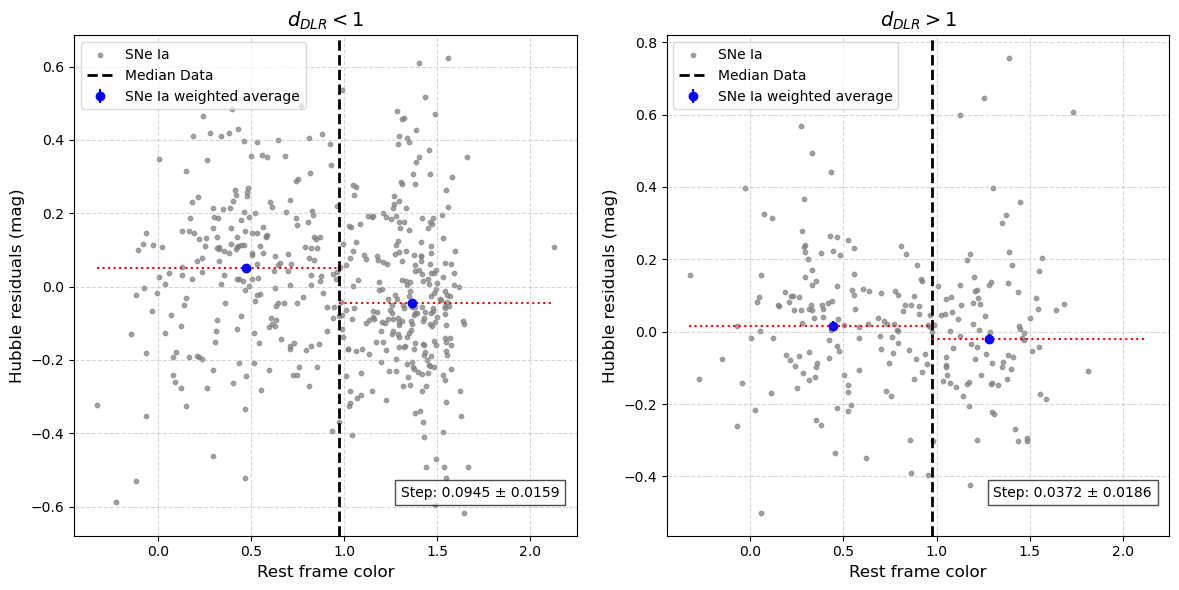

In [403]:
# Create a figure with two subplots (side-by-side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First subplot for dDLR < 1
ax1.scatter(color_dDLR_lt1, dmu_dDLR_lt1, s=10, color='gray', alpha=0.7, label='SNe Ia')
ax1.set_xlabel('Rest frame color', fontsize=12)
ax1.set_ylabel('Hubble residuals (mag)', fontsize=12)
ax1.axvline(x=med_color_dDLR_lt1, color='black', linestyle='--', lw=2, label='Median Data')

# Horizontal lines for weighted averages
ax1.hlines(color_wa_bm_dDLR_lt1, xmin=color.min(), xmax=med_color_dDLR_lt1, color='red', linestyle=':')
ax1.hlines(color_wa_am_dDLR_lt1, xmin=med_color_dDLR_lt1, xmax=color.max(), color='red', linestyle=':')

# Error bars for weighted averages
ax1.errorbar(color_x_bm_dDLR_lt1, color_wa_bm_dDLR_lt1, yerr=color_std_bm_dDLR_lt1, fmt='o', color='blue', label='SNe Ia weighted average')
ax1.errorbar(color_x_am_dDLR_lt1, color_wa_am_dDLR_lt1, yerr=color_std_am_dDLR_lt1, fmt='o', color='blue')
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.set_title('$d_{DLR} < 1$', fontsize=14)
ax1.legend(loc='upper left', fontsize=10, frameon=True, fancybox=True, framealpha=0.7)
ax1.text(0.65, 0.1, f'Step: {color_step_dDLR_lt1:.4f} ± {color_step_err_dDLR_lt1:.4f}', 
         transform=ax1.transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Second subplot for dDLR > 1
ax2.scatter(color_dDLR_gt1, dmu_dDLR_gt1, s=10, color='gray', alpha=0.7, label='SNe Ia')
ax2.set_xlabel('Rest frame color', fontsize=12)
ax2.set_ylabel('Hubble residuals (mag)', fontsize=12)
ax2.axvline(x=med_color_dDLR_gt1, color='black', linestyle='--', lw=2, label='Median Data')

# Horizontal lines for weighted averages
ax2.hlines(color_wa_bm_dDLR_gt1, xmin=color.min(), xmax=med_color_dDLR_gt1, color='red', linestyle=':')
ax2.hlines(color_wa_am_dDLR_gt1, xmin=med_color_dDLR_gt1, xmax=color.max(), color='red', linestyle=':')

# Error bars for weighted averages
ax2.errorbar(color_x_bm_dDLR_gt1, color_wa_bm_dDLR_gt1, yerr=color_std_bm_dDLR_gt1, fmt='o', color='blue', label='SNe Ia weighted average')
ax2.errorbar(color_x_am_dDLR_gt1, color_wa_am_dDLR_gt1, yerr=color_std_am_dDLR_gt1, fmt='o', color='blue')
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.set_title('$d_{DLR} > 1$', fontsize=14)
ax2.legend(loc='upper left', fontsize=10, frameon=True, fancybox=True, framealpha=0.7)
ax2.text(0.65, 0.1, f'Step: {color_step_dDLR_gt1:.4f} ± {color_step_err_dDLR_gt1:.4f}', 
         transform=ax2.transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the figure as a PNG file
file_path_combined = 'hubble_residuals_vs_color_dDLR_combined.png'
if os.path.isfile(file_path_combined):
    os.remove(file_path_combined)
plt.savefig(file_path_combined, dpi=300)

# Show the plot
plt.show()

In [404]:
sigma_ddlr= (0.10 - 0.036)/np.sqrt(0.014**2 + 0.018**2)
print(sigma_ddlr)

2.806585661782494


# EVALUATING DATA FOR DIFFERENCE REDSHIFT

In [405]:
#splitting data based on redshift value
z= df_merged['SPECZ']
med_z= np.median(z)
z_ltm= df_merged[z < med_z]
z_gtm= df_merged[z >= med_z]
z_gtm['SPECZ']
print(med_z)

0.529990017414093


z<median

In [406]:
#find median of [OII]
color_z_ltm= z_ltm['HOST_COLOR']
med_color_z_ltm= med_color

#split data into two
color_z_ltm_bm = z_ltm[color_z_ltm <= med_color_z_ltm]
color_z_ltm_am = z_ltm[color_z_ltm > med_color_z_ltm]
color_z_ltm_bm

#extract axis for plot
#y axis for plot
dmu_z_ltm= z_ltm['delta_mu']
#x axis for plot
color_z_ltm= z_ltm['HOST_COLOR']

#weighted average for below median 
color_values_bm_z_ltm = color_z_ltm_bm['delta_mu']
color_weights_bm_z_ltm = color_z_ltm_bm['MUERR']
color_wa_bm_z_ltm = weighted_average(color_values_bm_z_ltm, color_weights_bm_z_ltm)
print(f"[COLOR] The weighted average below median for z<med_z is: {color_wa_bm_z_ltm}")
#weighted average for above median
color_values_am_z_ltm = color_z_ltm_am['delta_mu']
color_weights_am_z_ltm = color_z_ltm_am['MUERR']
color_wa_am_z_ltm = weighted_average(color_values_am_z_ltm, color_weights_am_z_ltm)
print(f"[COLOR] The weighted average above median for z<med_z is: {color_wa_am_z_ltm}")

#uncertainty for below median
color_bootstrap_bm_z_ltm = create_bootstrap_samples_weighted(color_z_ltm_bm, 'delta_mu', 'MUERR')
color_std_bm_z_ltm= np.std(color_bootstrap_bm_z_ltm)
print("[COLOR] uncertainty for below median for z<med_z data:", color_std_bm_z_ltm)
#uncertainty for above median
color_bootstrap_am_z_ltm = create_bootstrap_samples_weighted(color_z_ltm_am, 'delta_mu', 'MUERR')
color_std_am_z_ltm= np.std(color_bootstrap_am_z_ltm)
print("[COLOR] uncertainty for above median for z<med_z data:", color_std_am_z_ltm)

#find corresponding x axis (median)
colormed_bm_z_ltm=color_z_ltm_bm['HOST_COLOR']
color_x_bm_z_ltm= np.median(colormed_bm_z_ltm)
colormed_am_z_ltm=color_z_ltm_am['HOST_COLOR']
color_x_am_z_ltm= np.median(colormed_am_z_ltm)

#calculate the difference of hubble residuals
color_step_z_ltm= abs(color_wa_bm_z_ltm - color_wa_am_z_ltm)
color_step_err_z_ltm= np.sqrt((color_std_am_z_ltm)**2 + (color_std_bm_z_ltm)**2)
print("[COLOR] hubble residual diff for z<med_z:", color_step_z_ltm)
print("[COLOR] the error of hubble residual diff for z<med_z:",color_step_err_z_ltm)




[COLOR] The weighted average below median for z<med_z is: 0.048406494886180144
[COLOR] The weighted average above median for z<med_z is: -0.049823174091475436
[COLOR] uncertainty for below median for z<med_z data: 0.009810817636988094
[COLOR] uncertainty for above median for z<med_z data: 0.01011054215007955
[COLOR] hubble residual diff for z<med_z: 0.09822966897765559
[COLOR] the error of hubble residual diff for z<med_z: 0.014088122844253304


z>median

In [407]:
#find median of [OII]
color_z_gtm= z_gtm['HOST_COLOR']
med_color_z_gtm= med_color

#split data into two
color_z_gtm_bm = z_gtm[color_z_gtm <= med_color_z_gtm]
color_z_gtm_am = z_gtm[color_z_gtm > med_color_z_gtm]

#extract axis for plot
#y axis for plot
dmu_z_gtm= z_gtm['delta_mu']
#x axis for plot
color_z_gtm= z_gtm['HOST_COLOR']

#weighted average for below median 
color_values_bm_z_gtm = color_z_gtm_bm['delta_mu']
color_weights_bm_z_gtm = color_z_gtm_bm['MUERR']
color_wa_bm_z_gtm = weighted_average(color_values_bm_z_gtm, color_weights_bm_z_gtm)
print(f"[COLOR] The weighted average below median for z>med_z is: {color_wa_bm_z_gtm}")
#weighted average for above median
color_values_am_z_gtm = color_z_gtm_am['delta_mu']
color_weights_am_z_gtm = color_z_gtm_am['MUERR']
color_wa_am_z_gtm = weighted_average(color_values_am_z_gtm, color_weights_am_z_gtm)
print(f"[COLOR] The weighted average above median for z>med_z is: {color_wa_am_z_gtm}")

#uncertainty for below median
color_bootstrap_bm_z_gtm = create_bootstrap_samples_weighted(color_z_gtm_bm, 'delta_mu', 'MUERR')
color_std_bm_z_gtm= np.std(color_bootstrap_bm_z_gtm)
print("[COLOR] uncertainty for below median for z>med_z data:", color_std_bm_z_gtm)
#uncertainty for above median
color_bootstrap_am_z_gtm = create_bootstrap_samples_weighted(color_z_gtm_am, 'delta_mu', 'MUERR')
color_std_am_z_gtm= np.std(color_bootstrap_am_z_gtm)
print("[COLOR] uncertainty for above median for z>med_z data:", color_std_am_z_gtm)

#find corresponding x axis (median)
colormed_bm_z_gtm=color_z_gtm_bm['HOST_COLOR']
color_x_bm_z_gtm= np.median(colormed_bm_z_gtm)
colormed_am_z_gtm=color_z_gtm_am['HOST_COLOR']
color_x_am_z_gtm= np.median(colormed_am_z_gtm)

#calculate the difference of hubble residuals
color_step_z_gtm= abs(color_wa_bm_z_gtm - color_wa_am_z_gtm)
color_step_err_z_gtm= np.sqrt((color_std_am_z_gtm)**2 + (color_std_bm_z_gtm)**2)
print("[COLOR] hubble residual diff for z>med_z:", color_step_z_gtm)
print("[COLOR] the error of hubble residual diff for z>med_z:", color_step_err_z_gtm)

# %%

[COLOR] The weighted average below median for z>med_z is: 0.007310629821148711
[COLOR] The weighted average above median for z>med_z is: -0.012558459913452755
[COLOR] uncertainty for below median for z>med_z data: 0.016672816720207456
[COLOR] uncertainty for above median for z>med_z data: 0.01563140704713658
[COLOR] hubble residual diff for z>med_z: 0.019869089734601466
[COLOR] the error of hubble residual diff for z>med_z: 0.02285440228181215


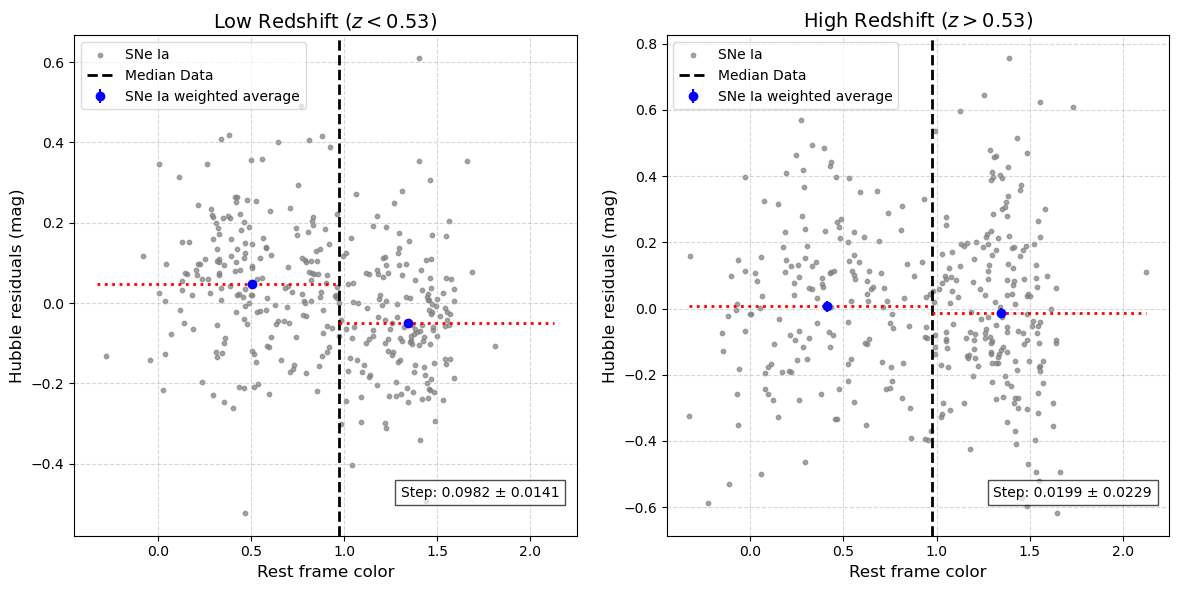

In [408]:
# Create a figure with two subplots (side-by-side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First subplot for low redshift
ax1.scatter(color_z_ltm, dmu_z_ltm, s=10, color='gray', alpha=0.7, label='SNe Ia')
ax1.set_xlabel('Rest frame color', fontsize=12)
ax1.set_ylabel('Hubble residuals (mag)', fontsize=12)
ax1.axvline(x=med_color_z_ltm, color='black', linestyle='--', lw=2, label='Median Data')
ax1.grid(True, linestyle='--', alpha=0.5)
# Error bars for weighted averages
ax1.errorbar(color_x_bm_z_ltm, color_wa_bm_z_ltm, yerr=color_std_bm_z_ltm, fmt='o', color='blue', label='SNe Ia weighted average')
ax1.errorbar(color_x_am_z_ltm, color_wa_am_z_ltm, yerr=color_std_am_z_ltm, fmt='o', color='blue')

# Horizontal line for the weighted average
ax1.hlines(color_wa_bm_z_ltm, xmin=color.min(), xmax=med_color_z_ltm, color='red', linestyle=':', lw=2)
ax1.hlines(color_wa_am_z_ltm, xmin=med_color_z_ltm, xmax=color.max(), color='red', linestyle=':', lw=2)

ax1.set_title('Low Redshift ($z < 0.53$)', fontsize=14)
ax1.legend(loc='upper left', fontsize=10, frameon=True, fancybox=True, framealpha=0.7)
ax1.text(0.65, 0.1, f'Step: {color_step_z_ltm:.4f} ± {color_step_err_z_ltm:.4f}', 
         transform=ax1.transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Second subplot for high redshift
ax2.scatter(color_z_gtm, dmu_z_gtm, s=10, color='gray', alpha=0.7, label='SNe Ia')
ax2.set_xlabel('Rest frame color', fontsize=12)
ax2.set_ylabel('Hubble residuals (mag)', fontsize=12)
ax2.axvline(x=med_color_z_gtm, color='black', linestyle='--', lw=2, label='Median Data')
ax2.grid(True, linestyle='--', alpha=0.5)
# Error bars for weighted averages
ax2.errorbar(color_x_bm_z_gtm, color_wa_bm_z_gtm, yerr=color_std_bm_z_gtm, fmt='o', color='blue', label='SNe Ia weighted average')
ax2.errorbar(color_x_am_z_gtm, color_wa_am_z_gtm, yerr=color_std_am_z_gtm, fmt='o', color='blue')

# Horizontal line for the weighted average
ax2.hlines(color_wa_bm_z_gtm, xmin=color.min(), xmax=med_color_z_gtm, color='red', linestyle=':', lw=2)
ax2.hlines(color_wa_am_z_gtm, xmin=med_color_z_gtm, xmax=color.max(), color='red', linestyle=':', lw=2)

ax2.set_title('High Redshift ($z > 0.53$)', fontsize=14)
ax2.legend(loc='upper left', fontsize=10, frameon=True, fancybox=True, framealpha=0.7)
ax2.text(0.65, 0.1, f'Step: {color_step_z_gtm:.4f} ± {color_step_err_z_gtm:.4f}', 
         transform=ax2.transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the figure as a PNG file
file_path_combined_redshift = 'hubble_residuals_vs_color_redshift_combined.png'
if os.path.isfile(file_path_combined_redshift):
    os.remove(file_path_combined_redshift)
plt.savefig(file_path_combined_redshift, dpi=300)

# Show the plot
plt.show()

In [409]:
sigma_z= (color_step_z_ltm - color_step_z_gtm)/np.sqrt(color_step_err_z_gtm**2 + color_step_err_z_ltm**2)
print(sigma_z)

2.91870752195174


# ANALYZING FOR 4 REDSHIFT BINS

     Unnamed: 0        Names  Redshift     SN_RA   SN_DEC     HOST_RA  \
0             0    SN2016coj   0.00570  182.0280  65.1772  182.024310   
1             1       2018gv   0.00602  121.3940 -11.4379  121.408500   
2             2       2019np   0.00648  157.3420  29.5106  157.333080   
3             3      2017erp   0.00677  227.3120 -11.3342  227.317040   
4             4  ASASSN-15so   0.00857  168.5460  48.3187  168.545385   
..          ...          ...       ...       ...      ...         ...   
159         159    AT2016gsu   0.07575   17.1024  21.1516   17.102210   
160         160    Gaia16acv   0.07859  179.9570  54.8022  179.957521   
161         161      PS15bzz   0.07931    9.4247   1.7628    9.423138   
162         162    SN2016glp   0.08410  354.0580  23.6960  354.058190   
163         163    SN2016grz   0.08704   28.8874  33.8229   28.887566   

      HOST_DEC  LOGMASS     Color        HR    HR_err  
0    65.174310   10.769  1.298282  0.019315  0.483672  
1   -11.427

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[colorf] uncertainty for above median data: 0.017394644519412247
[colorf] hubble residual diff: -0.05574515975243683
[colorf] the error of hubble residual diff: 0.024137148137012593


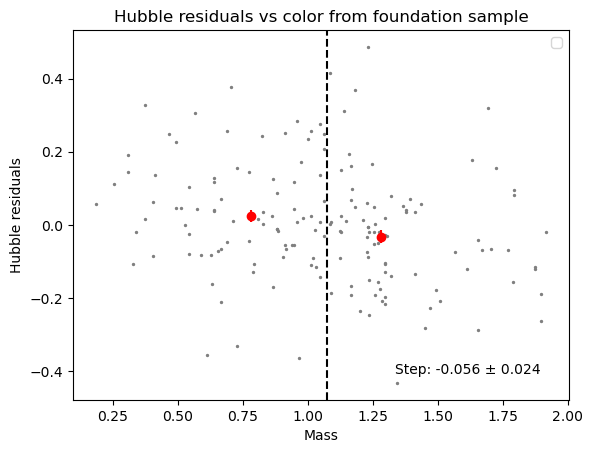

In [410]:
""" Foundation sample"""
print(dff2)
#MASS
#find median of [mass]
colorf= dff2['Color']
med_colorf= np.median(colorf)
print(med_colorf)

#split data into two
colorf_bm = dff2[colorf <= med_colorf]
colorf_am = dff2[colorf > med_colorf]

# %%
# [mass] weighted average for below median 
colorf_values_bm = colorf_bm['HR']
colorf_weights_bm = colorf_bm['HR_err']
colorf_wa_bm = weighted_average(colorf_values_bm, colorf_weights_bm)
print(f"[colorf]The weighted average below median is: {colorf_wa_bm}")
#weighted average for above median
colorf_values_am = colorf_am['HR']
colorf_weights_am = colorf_am['HR_err']
colorf_wa_am = weighted_average(colorf_values_am, colorf_weights_am)
print(f"[colorf] The weighted average above median is: {colorf_wa_am}")

# [mass] uncertainty for below median
colorfbootstrap_bm = create_bootstrap_samples_weighted(colorf_bm, 'HR', 'HR_err')
colorf_std_bm= np.std(colorfbootstrap_bm)
print("[colorf] uncertainty for below median data:",colorf_std_bm)
#uncertainty for above median
colorfbootstrap_am = create_bootstrap_samples_weighted(colorf_am, 'HR', 'HR_err')
colorf_std_am= np.std(colorfbootstrap_am)
print("[colorf] uncertainty for above median data:",colorf_std_am)

#find corresponding x axis (median)
colorfx_bm=colorf_bm['Color']
colorf_x_bm= np.median(colorfx_bm)
colorfx_am=colorf_am['Color']
colorf_x_am= np.median(colorfx_am)

#extract axis for plot
#y axis for plot
dmuf=dff2['HR']
#x axis for plot
colorf= dff2['Color']

#calculate the difference of hubble residuals
colorf_step= colorf_wa_am - colorf_wa_bm
colorf_step_err= np.sqrt((colorf_std_am)**2 + (colorf_std_bm)**2)
print("[colorf] hubble residual diff:", colorf_step)
print("[colorf] the error of hubble residual diff:", colorf_step_err)
#%%
#plotting
plt.figure()
plt.scatter(colorf,dmuf, s=2, color='gray')
plt.xlabel('Mass')
plt.ylabel('Hubble residuals')
plt.axvline(x=med_colorf, color='black', linestyle='--')
plt.errorbar(colorf_x_bm , colorf_wa_bm, yerr=colorf_std_bm, fmt='o', color='red')
plt.errorbar(colorf_x_am , colorf_wa_am, yerr=colorf_std_am, fmt='o', color='red')
plt.title('Hubble residuals vs color from foundation sample')
# Add legend
plt.legend()
# Add custom text annotation (keterangan)
plt.text(0.65, 0.1, f'Step: {colorf_step:.3f} ± {colorf_step_err:.3f} ', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
file_path2 = 'hubble_residuals_vs_color_foundation.png'
# Remove file if it exists
if os.path.isfile(file_path2):
    os.remove(file_path2)
# Save the plot as a PNG file
plt.savefig(file_path2)

#%%
#find median redshift
redshift=dff2['Redshift']
med_redshift=np.median(redshift)

OzDES data

In [411]:
#splitting data based on redshift value
z= df_merged['zHD']
q1_z=np.percentile(z, 25)
#q1_z_med=np.median(q1_z)
med_z= np.percentile(z,50)
q3_z=np.percentile(z,75)
#%%
reg1= df_merged[z < q1_z]
reg1_z_med = np.median(reg1['zHD'])
reg2 = df_merged[(z >= q1_z) & (z < med_z)]
reg2_z_med = np.median(reg2['zHD'])
reg3 = df_merged[(z >= med_z) & (z < q3_z)]
reg3_z_med = np.median(reg3['zHD'])
reg4= df_merged[z>=q3_z]
reg4_z_med = np.median(reg4['zHD'])
print(reg1['zHD'])
print(reg2['zHD'])
print(reg4['zHD'])
print(np.min(z), np.min(reg1['zHD']))

#%%
"""color"""
#find median of each region
#region 1
color_z_reg1= reg1['HOST_COLOR']
med_color_z_reg1= np.median(color_z_reg1)
#split data into two
color_z_reg1_bm = reg1[color_z_reg1 <= med_color_z_reg1]
color_z_reg1_am = reg1[color_z_reg1 > med_color_z_reg1]
#region 2
color_z_reg2= reg2['HOST_COLOR']
med_color_z_reg2= np.median(color_z_reg2)
#split data into two
color_z_reg2_bm = reg2[color_z_reg2 <= med_color_z_reg2]
color_z_reg2_am = reg2[color_z_reg2 > med_color_z_reg2]
#region 3
color_z_reg3= reg3['HOST_COLOR']
med_color_z_reg3= np.median(color_z_reg3)
#split data into two
color_z_reg3_bm = reg3[color_z_reg3 <= med_color_z_reg3]
color_z_reg3_am = reg3[color_z_reg3 > med_color_z_reg3]
#region 4
color_z_reg4= reg4['HOST_COLOR']
med_color_z_reg4= np.median(color_z_reg4)
#split data into two
color_z_reg4_bm = reg4[color_z_reg4 <= med_color_z_reg4]
color_z_reg4_am = reg4[color_z_reg4 > med_color_z_reg4]
print(color_z_reg4_am)
# %%
#region1
#weighted average for below median 
color_values_bm_z_reg1 = color_z_reg1_bm['delta_mu']
color_weights_bm_z_reg1 = color_z_reg1_bm['MUERR']
color_wa_bm_z_reg1 = weighted_average(color_values_bm_z_reg1, color_weights_bm_z_reg1)
print(f"[color] The weighted average below median for reg1 is: {color_wa_bm_z_reg1}")
#weighted average for above median
color_values_am_z_reg1 = color_z_reg1_am['delta_mu']
color_weights_am_z_reg1 = color_z_reg1_am['MUERR']
color_wa_am_z_reg1 = weighted_average(color_values_am_z_reg1, color_weights_am_z_reg1)
print(f"[color] The weighted average above median for reg1 is: {color_wa_am_z_reg1}")
#region2
#weighted average for below median 
color_values_bm_z_reg2 = color_z_reg2_bm['delta_mu']
color_weights_bm_z_reg2 = color_z_reg2_bm['MUERR']
color_wa_bm_z_reg2 = weighted_average(color_values_bm_z_reg2, color_weights_bm_z_reg2)
print(f"[color] The weighted average below median for reg2 is: {color_wa_bm_z_reg2}")
#weighted average for above median
color_values_am_z_reg2 = color_z_reg2_am['delta_mu']
color_weights_am_z_reg2 = color_z_reg2_am['MUERR']
color_wa_am_z_reg2 = weighted_average(color_values_am_z_reg2, color_weights_am_z_reg2)
print(f"[color] The weighted average above median for reg2 is: {color_wa_am_z_reg2}")
#region3
#weighted average for below median 
color_values_bm_z_reg3 = color_z_reg3_bm['delta_mu']
color_weights_bm_z_reg3 = color_z_reg3_bm['MUERR']
color_wa_bm_z_reg3 = weighted_average(color_values_bm_z_reg3, color_weights_bm_z_reg3)
print(f"[color] The weighted average below median for reg3 is: {color_wa_bm_z_reg3}")
#weighted average for above median
color_values_am_z_reg3 = color_z_reg3_am['delta_mu']
color_weights_am_z_reg3 = color_z_reg3_am['MUERR']
color_wa_am_z_reg3 = weighted_average(color_values_am_z_reg3, color_weights_am_z_reg3)
print(f"[color] The weighted average above median for reg3 is: {color_wa_am_z_reg3}")
#region4
#weighted average for below median 
color_values_bm_z_reg4 = color_z_reg4_bm['delta_mu']
color_weights_bm_z_reg4 = color_z_reg4_bm['MUERR']
color_wa_bm_z_reg4 = weighted_average(color_values_bm_z_reg4, color_weights_bm_z_reg4)
print(f"[color] The weighted average below median for reg4 is: {color_wa_bm_z_reg4}")
#weighted average for above median
color_values_am_z_reg4 = color_z_reg4_am['delta_mu']
color_weights_am_z_reg4 = color_z_reg4_am['MUERR']
color_wa_am_z_reg4 = weighted_average(color_values_am_z_reg4, color_weights_am_z_reg4)
print(f"[color] The weighted average above median for reg4 is: {color_wa_am_z_reg4}")
# %%
print(color_weights_bm_z_reg1)
#%%
#region1
#uncertainty for below median
color_bootstrap_bm_z_reg1 = create_bootstrap_samples_weighted(color_z_reg1_bm, 'delta_mu', 'MUERR')
color_std_bm_z_reg1= np.std(color_bootstrap_bm_z_reg1)
intrinsic_error_bm_z_reg1= intrinsic_error(color_z_reg1_bm['MUERR'].values)
#%%
print("[color] uncertainty for below median for reg1 data:", mass_std_bm_z_reg1)
#%%
#uncertainty for above median
color_bootstrap_am_z_reg1= create_bootstrap_samples_weighted(color_z_reg1_am, 'delta_mu', 'MUERR')
color_std_am_z_reg1= np.std(color_bootstrap_am_z_reg1)
intrinsic_error_am_z_reg1= intrinsic_error(color_z_reg1_am['MUERR'].values)
print("[color] uncertainty for above median for reg1 data:", color_std_am_z_reg1)
#region2
#uncertainty for below median
color_bootstrap_bm_z_reg2 = create_bootstrap_samples_weighted(color_z_reg2_bm, 'delta_mu', 'MUERR')
color_std_bm_z_reg2= np.std(color_bootstrap_bm_z_reg2)
intrinsic_error_bm_z_reg2= intrinsic_error(color_z_reg2_bm['MUERR'].values)
print("[color] uncertainty for below median for reg2 data:", color_std_bm_z_reg2)
#uncertainty for above median
color_bootstrap_am_z_reg2= create_bootstrap_samples_weighted(color_z_reg2_am, 'delta_mu', 'MUERR')
color_std_am_z_reg2= np.std(color_bootstrap_am_z_reg2)
intrinsic_error_am_z_reg2= intrinsic_error(color_z_reg2_am['MUERR'].values)
print("[color] uncertainty for above median for reg2 data:", color_std_am_z_reg2)
#region3
#uncertainty for below median
color_bootstrap_bm_z_reg3 = create_bootstrap_samples_weighted(color_z_reg3_bm, 'delta_mu', 'MUERR')
color_std_bm_z_reg3= np.std(color_bootstrap_bm_z_reg3)
intrinsic_error_bm_z_reg3= intrinsic_error(color_z_reg3_bm['MUERR'].values)
print("color] uncertainty for below median for reg3 data:", color_std_bm_z_reg3)
#uncertainty for above median
color_bootstrap_am_z_reg3= create_bootstrap_samples_weighted(color_z_reg3_am, 'delta_mu', 'MUERR')
color_std_am_z_reg3= np.std(color_bootstrap_am_z_reg3)
intrinsic_error_am_z_reg3= intrinsic_error(color_z_reg3_am['MUERR'].values)
print("[color] uncertainty for above median for reg3 data:", color_std_am_z_reg3)
#region4
#uncertainty for below median
color_bootstrap_bm_z_reg4 = create_bootstrap_samples_weighted(color_z_reg4_bm, 'delta_mu', 'MUERR')
color_std_bm_z_reg4= np.std(color_bootstrap_bm_z_reg4)
intrinsic_error_bm_z_reg4= intrinsic_error(color_z_reg4_bm['MUERR'].values)
print("[MASS] uncertainty for below median for reg4 data:", color_std_bm_z_reg4)
#uncertainty for above median
color_bootstrap_am_z_reg4= create_bootstrap_samples_weighted(color_z_reg4_am, 'delta_mu', 'MUERR')
color_std_am_z_reg4= np.std(color_bootstrap_am_z_reg4)
intrinsic_error_am_z_reg4= intrinsic_error(color_z_reg4_am['MUERR'].values)
print("[MASS] uncertainty for above median for reg4 data:",color_std_am_z_reg4)
# %%
#calculate the difference of hubble residuals
#region1
color_step_z_reg1= color_wa_am_z_reg1 - color_wa_bm_z_reg1
color_step_err_z_reg1= np.sqrt((color_std_am_z_reg1)**2 + (color_std_bm_z_reg1)**2)
intrin_step_err_z_reg1= np.sqrt((intrinsic_error_am_z_reg1)**2 + (intrinsic_error_bm_z_reg1)**2)
print("[MASS] hubble residual diff for reg1:", mass_step_z_reg1, "with redshift=", reg1_z_med )
print("[MASS] the error of hubble residual diff for reg1:", mass_step_err_z_reg1)
print("[MASS] the intrinsic error of hubble residual diff for reg1:", intrin_step_err_z_reg1)
#region2
color_step_z_reg2= color_wa_am_z_reg2 - color_wa_bm_z_reg2
color_step_err_z_reg2= np.sqrt((color_std_am_z_reg2)**2 + (color_std_bm_z_reg2)**2)
intrin_step_err_z_reg2= np.sqrt((intrinsic_error_am_z_reg2)**2 + (intrinsic_error_bm_z_reg2)**2)
print("[MASS] hubble residual diff for reg2:", color_step_z_reg2, "with redshift=", reg2_z_med )
print("[MASS] the error of hubble residual diff for reg2", color_step_err_z_reg2)
print("[MASS] the intrinsic error of hubble residual diff for reg2:", intrin_step_err_z_reg2)
#region3
color_step_z_reg3= color_wa_am_z_reg3 - color_wa_bm_z_reg3
color_step_err_z_reg3= np.sqrt((color_std_am_z_reg3)**2 + (color_std_bm_z_reg3)**2)
intrin_step_err_z_reg3= np.sqrt((intrinsic_error_am_z_reg3)**2 + (intrinsic_error_bm_z_reg3)**2)
print("[MASS] hubble residual diff for reg3:", mass_step_z_reg3, "with redshift=", reg3_z_med )
print("[MASS] the error of hubble residual diff for reg3:", mass_step_err_z_reg3)
print("[MASS] the intrinsic error of hubble residual diff for reg3:", intrin_step_err_z_reg3)
#region4
color_step_z_reg4= color_wa_am_z_reg4 - color_wa_bm_z_reg4
color_step_err_z_reg4= np.sqrt((color_std_am_z_reg4)**2 + (color_std_bm_z_reg4)**2)
intrin_step_err_z_reg4= np.sqrt((intrinsic_error_am_z_reg4)**2 + (intrinsic_error_bm_z_reg4)**2)
print("[MASS] hubble residual diff for reg4:", color_step_z_reg4, "with redshift=", reg4_z_med )
print("[MASS] the error of hubble residual diff for reg4", color_step_err_z_reg4)
print("[MASS] the intrinsic error of hubble residual diff for reg4:", intrin_step_err_z_reg4)

9      0.36101
10     0.26150
17     0.17267
30     0.16008
34     0.35723
        ...   
671    0.29376
672    0.27905
674    0.21711
685    0.31042
692    0.31251
Name: zHD, Length: 174, dtype: float64
1      0.38884
3      0.42420
7      0.49412
13     0.48417
14     0.52790
        ...   
677    0.45944
679    0.47273
683    0.39365
691    0.51197
694    0.38683
Name: zHD, Length: 173, dtype: float64
2      0.92576
5      0.78375
6      0.73306
11     0.95791
25     0.68456
        ...   
670    0.68438
681    0.68673
686    0.81684
688    0.71827
693    0.68397
Name: zHD, Length: 174, dtype: float64
0.05962 0.05962
    VARNAMES:      CID   CIDint  IDSURVEY  TYPE FIELD  CUTFLAG_SNANA  \
5         SN:  1833468  1833468        10     0    X3              3   
6         SN:  1338718  1338718        10     0    S1              3   
11        SN:  1339246  1339246        10     0    C3              3   
28        SN:  1264038  1264038        10     0    C3              3   
36        SN

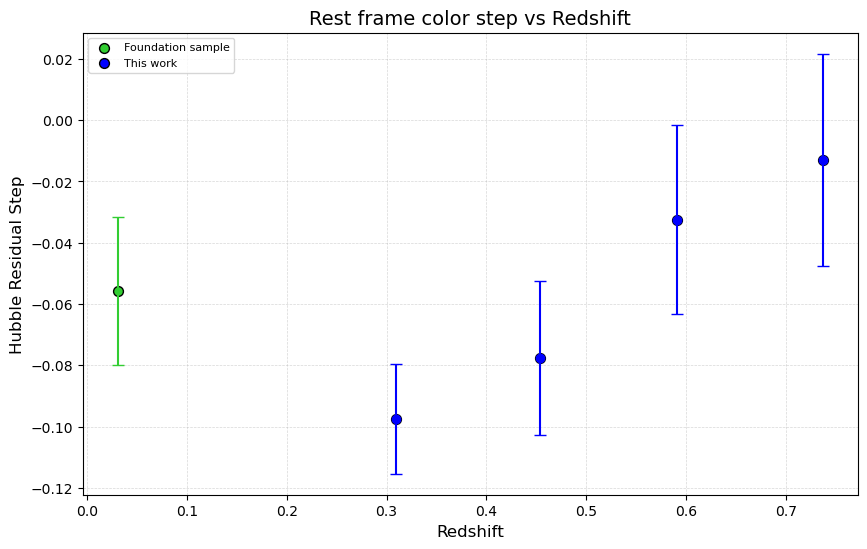

In [412]:
plt.figure(figsize=(10, 6))

# Plotting the Foundation sample
plt.scatter(med_redshift, colorf_step, color='limegreen', label=r'Foundation sample', s=50, edgecolor='black')
plt.errorbar(med_redshift, colorf_step, yerr=colorf_step_err, color='limegreen', capsize=4)

# Plotting OzDES data
ozdes_data = [
    (reg1_z_med, color_step_z_reg1, color_step_err_z_reg1),
    (reg2_z_med, color_step_z_reg2, color_step_err_z_reg2),
    (reg3_z_med, color_step_z_reg3, color_step_err_z_reg3),
    (reg4_z_med, color_step_z_reg4, color_step_err_z_reg4),
]

for z_med, mass_step_z, err in ozdes_data:
    plt.scatter(z_med, mass_step_z, color='blue', s=50, edgecolor='black', label=r'This work' if z_med == reg1_z_med else "")
    plt.errorbar(z_med, mass_step_z, yerr=err, fmt='o', color='blue', capsize=4)

# Labels and title
plt.xlabel(r'Redshift', fontsize=12)
plt.ylabel(r'Hubble Residual Step', fontsize=12)
plt.title(r'Rest frame color step vs Redshift', fontsize=14)

# Add grid
plt.grid(alpha=0.5, linestyle='--', linewidth=0.5)

# Adjust legend size and location
plt.legend(fontsize=8, loc='upper left')

# File saving process
file_pathz1 = 'color_step_vs_redshift.png'
if os.path.isfile(file_pathz1):
    os.remove(file_pathz1)

# Save the plot as a PNG file
plt.savefig(file_pathz1, bbox_inches='tight', dpi=300)
plt.show()  # Show the plot